## Loading the Required Libraries

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#importing libraries for feature selection & cross validation
from sklearn.feature_selection import f_oneway,chi2,f_regression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error,make_scorer

#importing ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

random_state = 29


#### Setting the working directory

In [2]:
os.chdir("C:/Users/acer/Desktop/edWisor Project 2/Bike-Rent-python")
os.getcwd()

'C:\\Users\\acer\\Desktop\\edWisor Project 2\\Bike-Rent-python'

##  Import the dataset

We will import the given dataset "day.csv" using pandas library

In [3]:
dataset = pd.read_csv("day.csv")

##  Pre-Processing & Exploratory Data Analysis

### Examining the Dataset

In [4]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


1. We can see from the info that there are 16 variables in the dataset in which casual,registered & cnt are dependent variable and rest of them are independent variable.
2. It can be seen that there are no null values in the data set and each of the variable is having 731 non-null entries
3. It can also be infered that only the dteday variable has the dtype as object and rest of the variables are having numeric dtype i.e. either float or int.

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###  Data Cleaning

1. We first rename the variables as they are given in short hand format

In [7]:
dataset.rename(columns= {"dteday" : "date","yr":"year","mnth":"month","weathersit":"weather_condition","temp":"temperature",
                         "atemp":"feeled_temperature","hum":"humidity","cnt":"total_count","casual":"casual_users",
                         "registered":"registered_users"},inplace=True)
dataset.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'feeled_temperature',
       'humidity', 'windspeed', 'casual_users', 'registered_users',
       'total_count'],
      dtype='object')

2. As the variable "instant" is just representing the index in our dataset we would drop this variable

In [8]:
dataset.drop(labels="instant",axis=1,inplace=True)
dataset.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeled_temperature,humidity,windspeed,casual_users,registered_users,total_count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
dataset['date'].dtypes

dtype('O')

In [10]:
dataset.date.nunique()

731

As all the entries in the date variable are unique so we can not really infer anything from this, so we will drop the variable date from our dataset

In [11]:
dataset.drop(labels="date",axis=1,inplace=True)
dataset.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feeled_temperature,humidity,windspeed,casual_users,registered_users,total_count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###### Missing Value Analysis

We have already seen while examining the dataset that each variable is having 731 non-null entries i.e. no missing values are there, however let's cross check once again

In [12]:
dataset.isnull().sum()

season                0
year                  0
month                 0
holiday               0
weekday               0
workingday            0
weather_condition     0
temperature           0
feeled_temperature    0
humidity              0
windspeed             0
casual_users          0
registered_users      0
total_count           0
dtype: int64

###### Outlier Analysis

1. Let's plot the distribution graph of each variable to have an idea about the outliers

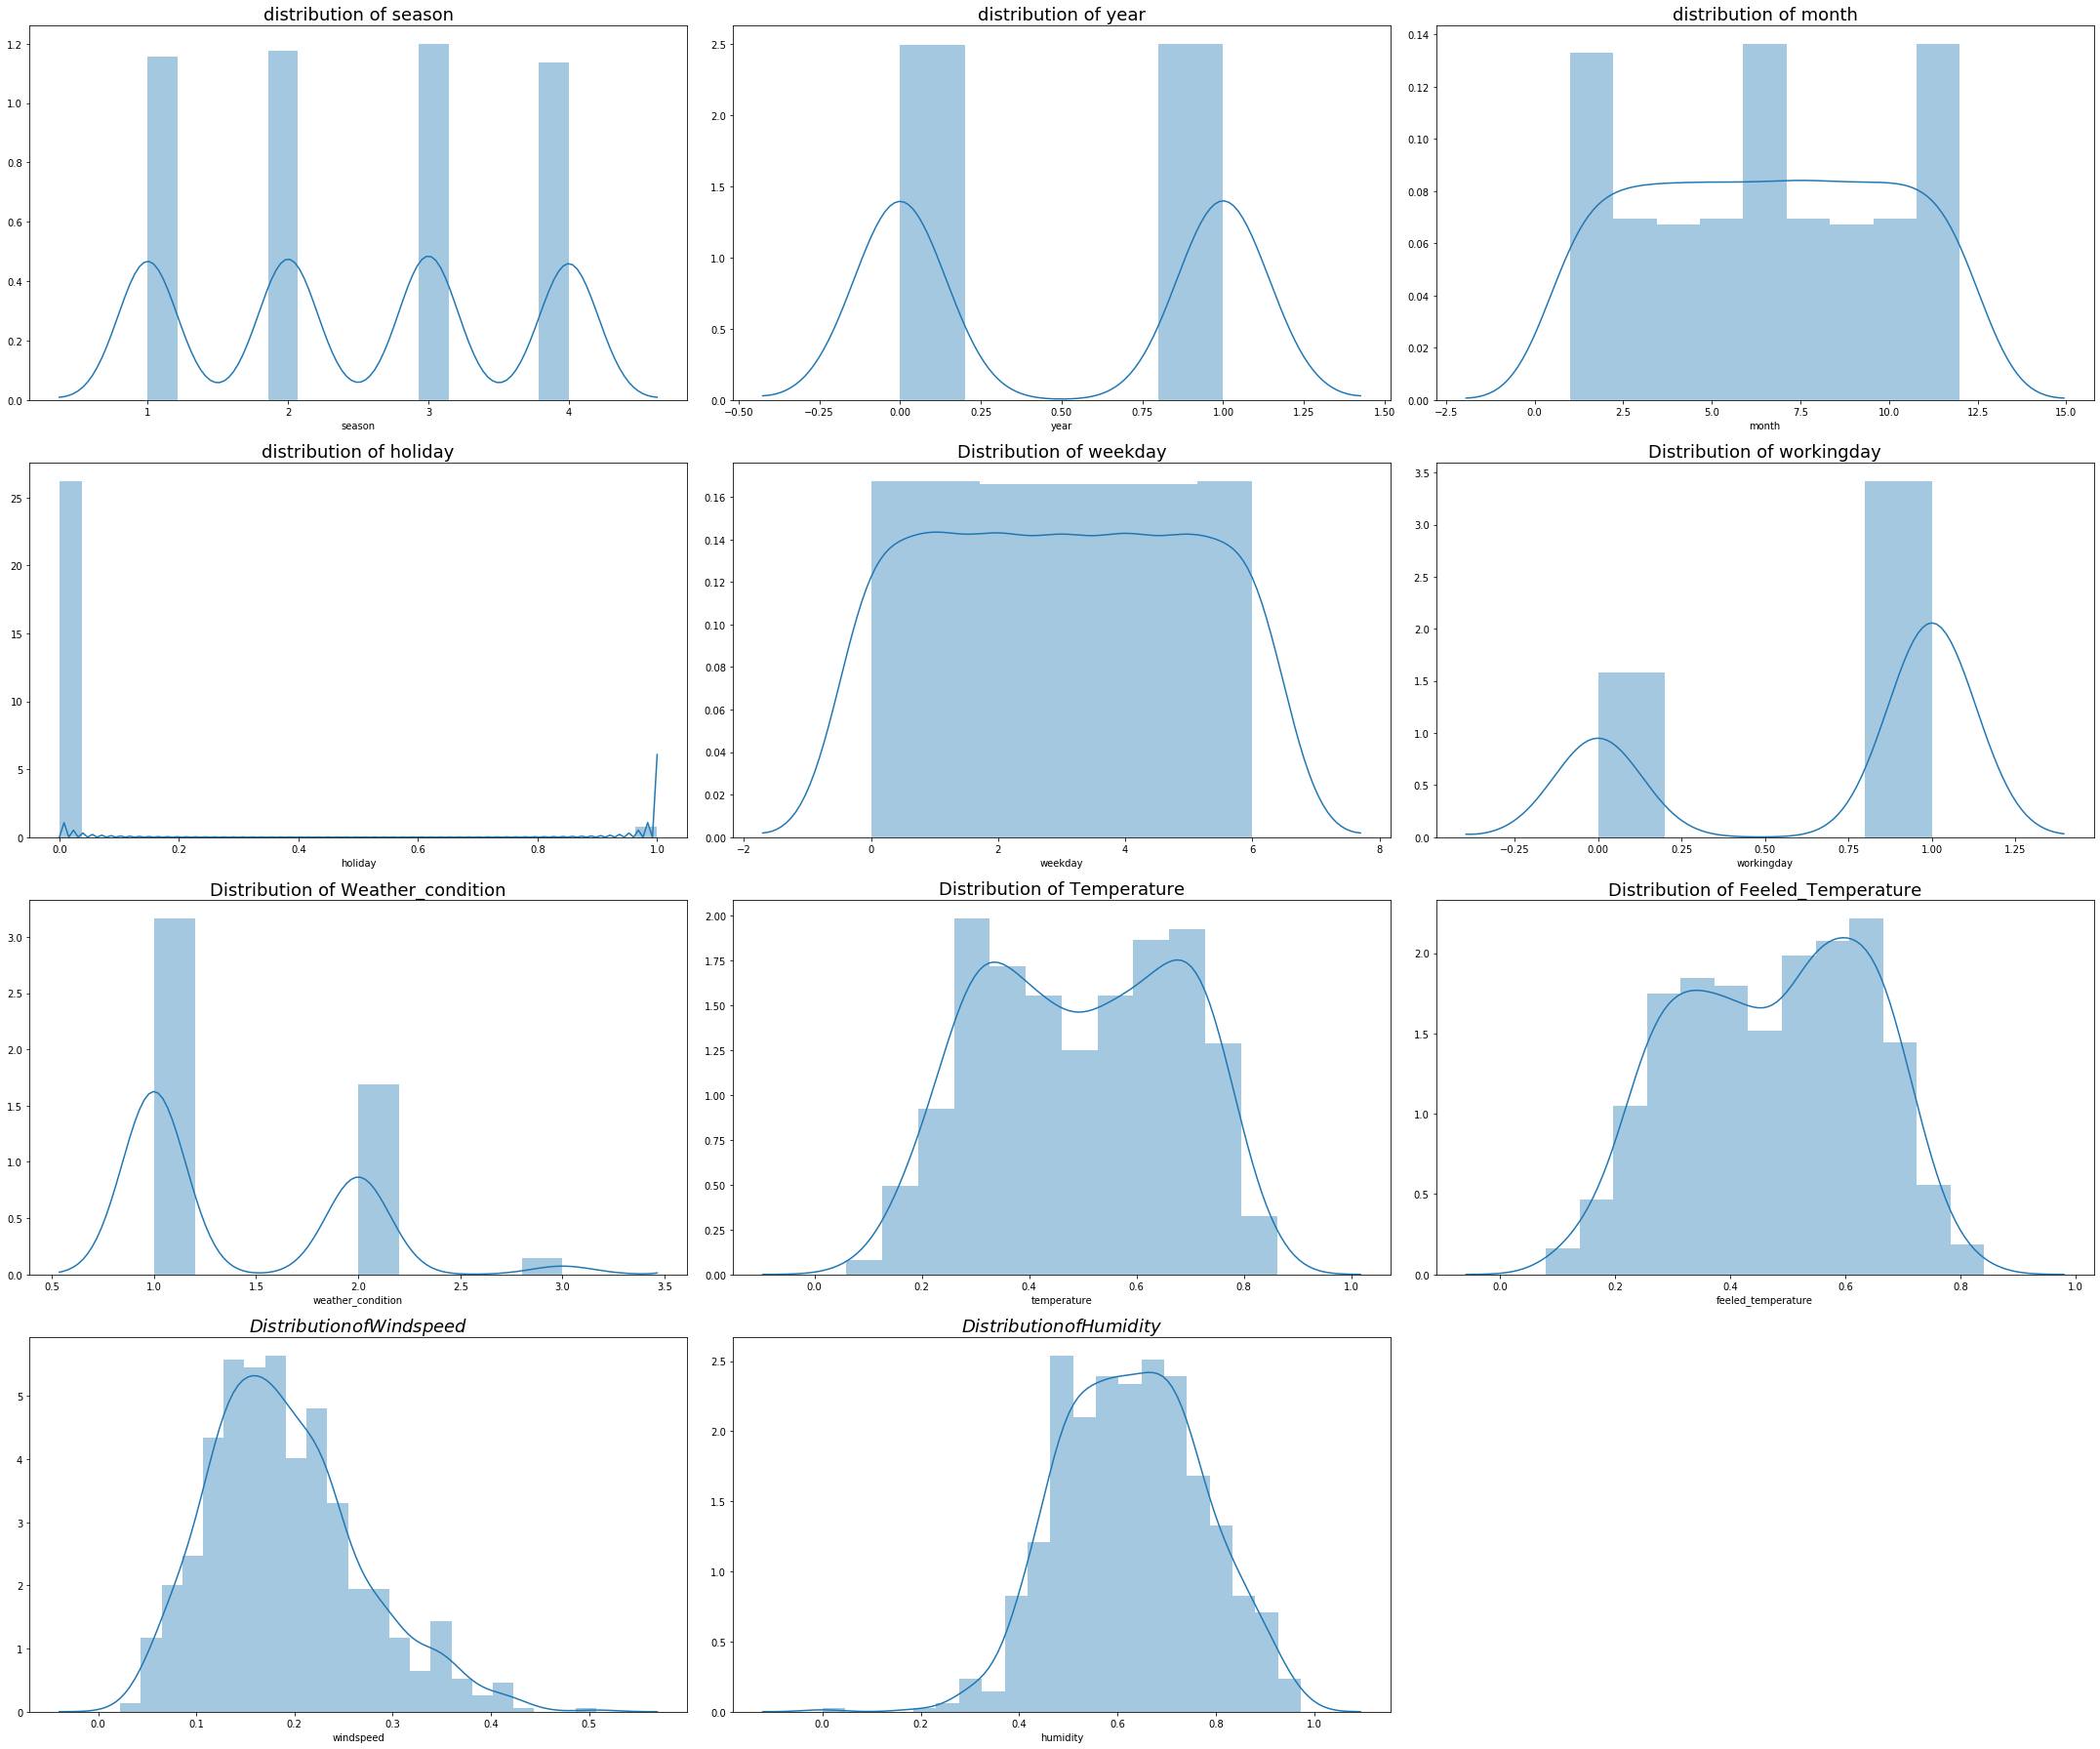

In [13]:
plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
plt.title("distribution of season",fontdict={"fontsize":18})
sns.distplot(dataset['season'],norm_hist=True)

plt.subplot(4,3,2)
plt.title("distribution of year",fontdict={"fontsize":18})
sns.distplot(dataset['year'],norm_hist=True)

plt.subplot(4,3,3)
plt.title("distribution of month",fontdict={"fontsize":18})
sns.distplot(dataset['month'],norm_hist=True)

plt.subplot(4,3,4)
plt.title("distribution of holiday",fontdict={"fontsize":18})
sns.distplot(dataset['holiday'],norm_hist=True)

plt.subplot(4,3,5)
plt.title("Distribution of weekday",fontdict={"fontsize":18})
sns.distplot(dataset['weekday'],norm_hist=True)

plt.subplot(4,3,6)
plt.title("Distribution of workingday",fontdict={"fontsize":18})
sns.distplot(dataset['workingday'],norm_hist=True)

plt.subplot(4,3,7)
plt.title("Distribution of Weather_condition",fontdict={"fontsize":18})
sns.distplot(dataset['weather_condition'],norm_hist=True)

plt.subplot(4,3,8)
plt.title("Distribution of Temperature",fontdict={"fontsize":18})
sns.distplot(dataset['temperature'],norm_hist=True)

plt.subplot(4,3,9)
plt.title("Distribution of Feeled_Temperature" ,fontdict={"fontsize":18})
sns.distplot(dataset['feeled_temperature'],norm_hist=True)

plt.subplot(4,3,10)
plt.title("$Distribution of Windspeed$",fontdict={"fontsize":18})
sns.distplot(dataset['windspeed'],norm_hist=True)

plt.subplot(4,3,11)
plt.title("$Distribution of Humidity$",fontdict={"fontsize":18})
sns.distplot(dataset['humidity'],norm_hist=True)

plt.tight_layout()

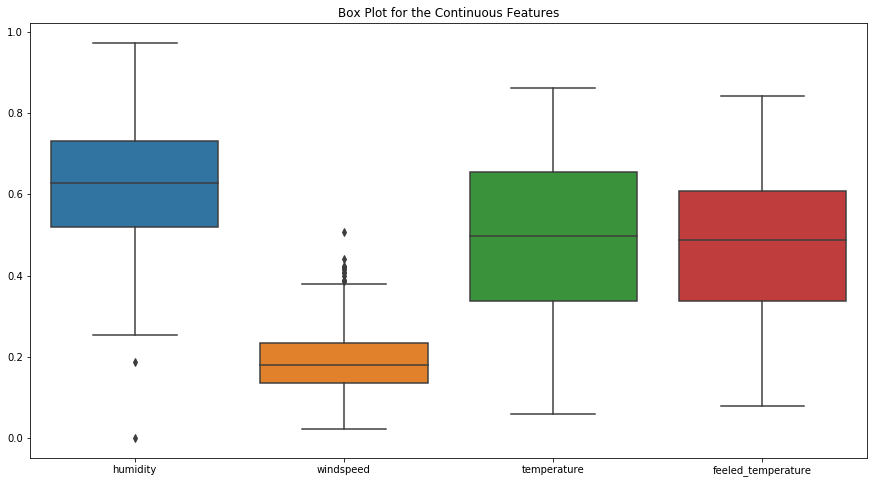

In [14]:
#Temp,atemp,windspeed,humidity outliers:-

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=dataset[["humidity","windspeed","temperature","feeled_temperature"]])
ax.set_title('Box Plot for the Continuous Features')
plt.show()


### Feature Engineering

####  Analysis of Dependent Variables

###### Now before applying the feature engineering technique we should first split our dataset into train and test dataset to avoid data leakage

In [15]:
X =dataset.drop(labels='total_count',axis=1)
y =dataset['total_count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = random_state)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((548, 13), (183, 13), (548,), (183,))

In [16]:
train_set = pd.concat(objs=(X_train,y_train),axis=1).reset_index()
test_set = pd.concat(objs=(X_test,y_test),axis=1).reset_index()

In [17]:
dependent_variable = train_set[['total_count',"casual_users","registered_users"]]
dependent_variable.head()

,total_count,casual_users,registered_users
0,5409,2235,3174
1,2475,259,2216
2,1096,140,956
3,3894,404,3490
4,1530,64,1466


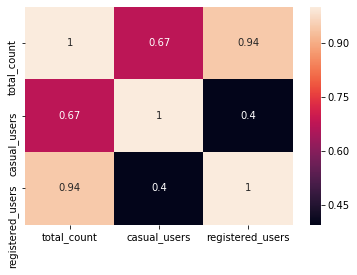

In [18]:
sns.heatmap(dependent_variable.corr(),annot=True)

In [19]:
X_train.drop(labels=["registered_users","casual_users"],axis=1,inplace=True)
X_test.drop(labels=["registered_users","casual_users"],axis=1,inplace=True)

##### Let's check the correlation between various countinuous features present in our dataset

In [20]:
numerical_features = X_train[["temperature","feeled_temperature","humidity","windspeed"]]

Text(0.5, 1, 'Heatmap for Correlation between continuous variables of train set')

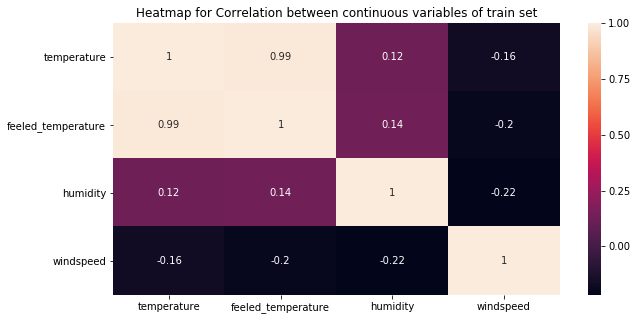

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_features.corr(),annot=True)
plt.title("Heatmap for Correlation between continuous variables of train set")

As the correlation between both the temerature variables is very high we would be dropping feeled_tempereature variable from our dataset


In [22]:
X_train.drop(labels=["feeled_temperature"],axis=1,inplace=True)
X_test.drop(labels=["feeled_temperature"],axis=1,inplace=True)
X_train.shape,X_test.shape

((548, 10), (183, 10))

#### Analysis of categorical variable:


##### Variable- "Season"

In [23]:
X_train['season'].value_counts()

2    141
4    137
1    137
3    133
Name: season, dtype: int64

Grouping the mean value of total bike count by the variable season to see the impact of different season on bike counts

In [24]:
season_grp = train_set['total_count'].groupby(train_set['season']).mean()
season_grp.sort_values(ascending=True)

season
1    2618.306569
4    4769.423358
2    5022.106383
3    5580.330827
Name: total_count, dtype: float64

In [25]:
#run the anova test first to see if the mean for each season differes significantly

#creating group of the samples according to seasons type
season_1 = train_set[train_set['season']==1]
season_2 = train_set[train_set['season']==2]
season_3 = train_set[train_set['season']==3]
season_4 = train_set[train_set['season']==4]

#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(season_1.total_count,season_2.total_count,season_3.total_count,season_4.total_count)

(array([92.06493988]), array([3.41205343e-48]))

As p-value is quite less than the critical value i.e. 0.05 we reject the null hypothesis and conclude that there is a significant difference between the group means.

As the group means are significantly different the season feature can be helpful in predicting the bike count

#### Encoding the categorical variable season by replacing the given levels with the relative mean deviation of each level from the over all mean

In [26]:
bikecount_mean = train_set.total_count.mean()
bikecount_mean

4493.467153284671

In [27]:
#Encoding the variable with Rel mean deviation with target variable
season1_wt = round((season_grp[1]-bikecount_mean)/bikecount_mean,3)
season2_wt = round((season_grp[2]-bikecount_mean)/bikecount_mean,3)
season3_wt = round((season_grp[3]-bikecount_mean)/bikecount_mean,3)
season4_wt = round((season_grp[4]-bikecount_mean)/bikecount_mean,3)

season_wt_assign = {1 : season1_wt,2:season2_wt,3:season3_wt,4:season4_wt}

X_train['season_wt'] = X_train['season'].map(season_wt_assign)
X_test['season_wt'] = X_test['season'].map(season_wt_assign)

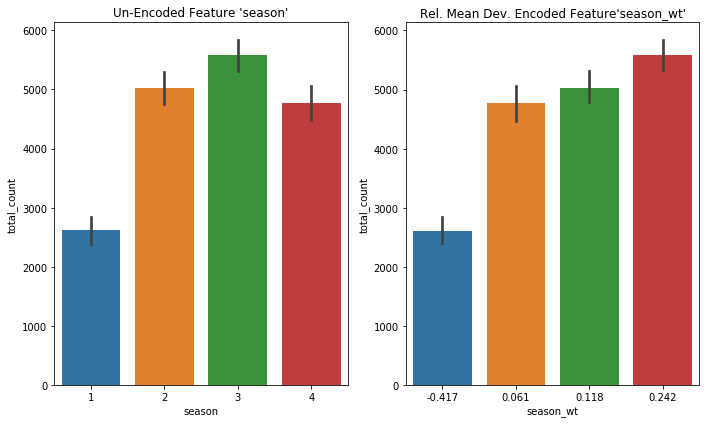

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(X_train['season'],y_train)
plt.title("Un-Encoded Feature 'season'")
plt.subplot(1,2,2)
sns.barplot(X_train['season_wt'],y_train)
plt.title("Rel. Mean Dev. Encoded Feature'season_wt'")

plt.tight_layout()


In [29]:
#Now drop the original variable "Season" from our dataset
X_train.drop(labels='season',axis=1,inplace=True)
X_test.drop(labels='season',axis=1,inplace=True)

###### In a similar way we will deal with each categorical variable

#### Variable "Month"

In [30]:
X_train['month'].value_counts()

5     49
10    48
8     48
12    47
11    47
6     47
4     47
2     47
1     46
9     42
7     40
3     40
Name: month, dtype: int64

In [31]:
month_grp = train_set['total_count'].groupby(train_set['month']).mean()
month_grp

month
1     2266.478261
2     2620.127660
3     3714.575000
4     4592.127660
5     5344.591837
6     5767.234043
7     5491.125000
8     5483.791667
9     5870.238095
10    5231.187500
11    4159.085106
12    3439.723404
Name: total_count, dtype: float64

In [32]:
#run the anova test first to see if the mean for each month differes significantly

#group the samples as per month type
month_1 = train_set[train_set['month']==1]
month_2 = train_set[train_set['month']==2]
month_3 = train_set[train_set['month']==3]
month_4 = train_set[train_set['month']==4]
month_5 = train_set[train_set['month']==5]
month_6 = train_set[train_set['month']==6]
month_7 = train_set[train_set['month']==7]
month_8 = train_set[train_set['month']==8]
month_9 = train_set[train_set['month']==9]
month_10 = train_set[train_set['month']==10]
month_11 = train_set[train_set['month']==11]
month_12 = train_set[train_set['month']==12]


#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(month_1.total_count,month_2.total_count,month_3.total_count,month_4.total_count,month_5.total_count,month_6.total_count,month_7.total_count,month_8.total_count,month_9.total_count,month_10.total_count,month_11.total_count,month_12.total_count)

(array([30.01956405]), array([3.07099941e-49]))

#As the p-value is again far less than the critical value 0.05 we reject the null hypothesis H0

In [33]:
#Encoding the variable with Rel mean deviation with target variable
month1wt = round((month_grp[1]-bikecount_mean)/bikecount_mean,3)
month2wt = round((month_grp[2]-bikecount_mean)/bikecount_mean,3)
month3wt = round((month_grp[3]-bikecount_mean)/bikecount_mean,3)
month4wt = round((month_grp[4]-bikecount_mean)/bikecount_mean,3)
month5wt = round((month_grp[5]-bikecount_mean)/bikecount_mean,3)
month6wt = round((month_grp[6]-bikecount_mean)/bikecount_mean,3)
month7wt = round((month_grp[7]-bikecount_mean)/bikecount_mean,3)
month8wt = round((month_grp[8]-bikecount_mean)/bikecount_mean,3)
month9wt = round((month_grp[9]-bikecount_mean)/bikecount_mean,3)
month10wt = round((month_grp[10]-bikecount_mean)/bikecount_mean,3)
month11wt = round((month_grp[11]-bikecount_mean)/bikecount_mean,3)
month12wt = round((month_grp[12]-bikecount_mean)/bikecount_mean,3)

monthwt_assign = {1:month1wt,
                  2:month2wt,
                  3:month3wt,
                  4:month4wt,
                  5:month5wt,
                  6:month6wt,
                  7:month7wt,
                  8:month8wt,
                  9:month9wt,
                  10:month10wt,
                  11:month11wt,
                  12:month12wt
                 }

X_train["month_wt"] = X_train['month'].map(monthwt_assign)
X_test["month_wt"] = X_test['month'].map(monthwt_assign)

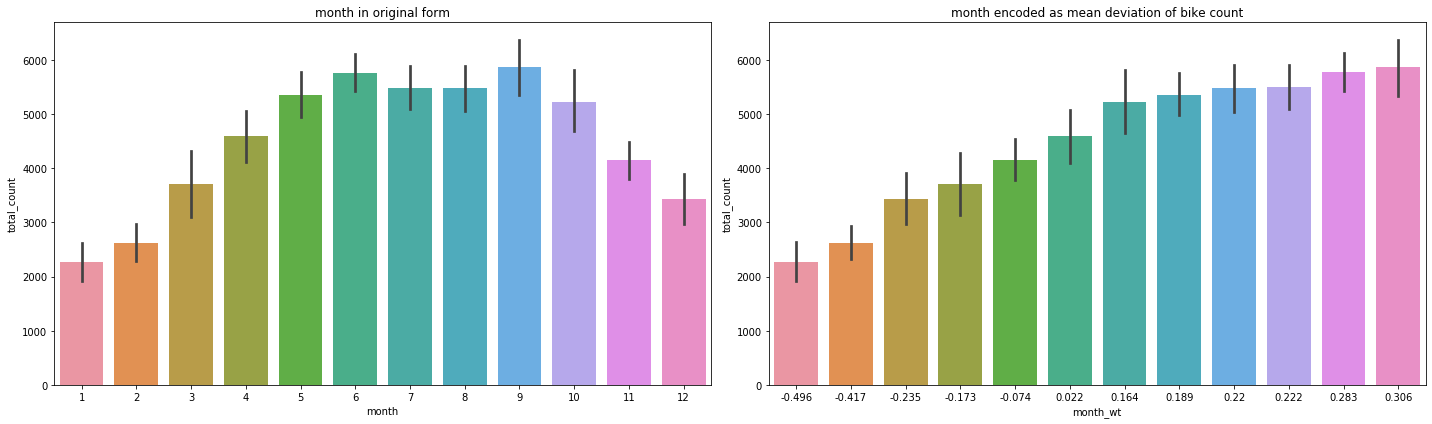

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(X_train['month'],y_train)
plt.title("month in original form")

plt.subplot(1,2,2)
sns.barplot(X_train['month_wt'],y_train)
plt.title("month encoded as mean deviation of bike count")

plt.tight_layout()



In [35]:
#Now Drop the original feature "month"
X_train.drop(labels='month',axis=1,inplace=True)
X_test.drop(labels='month',axis=1,inplace=True)

#### Variable- "Year"

In [36]:
X_train['year'].value_counts()

0    278
1    270
Name: year, dtype: int64

In [37]:
yr_grp = train_set['total_count'].groupby(train_set['year']).mean()
yr_grp

year
0    3424.881295
1    5593.714815
Name: total_count, dtype: float64

In [38]:
#run the anova test first to see if the mean for each year differes significantly

#group the samples as per years
year_1 = train_set[train_set['year']==0]
year_2 = train_set[train_set['year']==1]


#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(year_1.total_count,year_2.total_count)

(array([251.12914193]), array([8.28923257e-47]))

#As p-value is far less than 0.05 we would reject the null hypothesis and conclude that there is a significant difference in the means for the given years

In [39]:
#Encoding the variable with Rel mean deviation with target variable
yearwt_0 = round((yr_grp[0]-bikecount_mean)/bikecount_mean,3)
yearwt_1 = round((yr_grp[1]-bikecount_mean)/bikecount_mean,3)

yearwt_assign = {0:yearwt_0,1:yearwt_1}

X_train['year_wt'] = X_train['year'].map(yearwt_assign)
X_test['year_wt'] = X_test['year'].map(yearwt_assign)

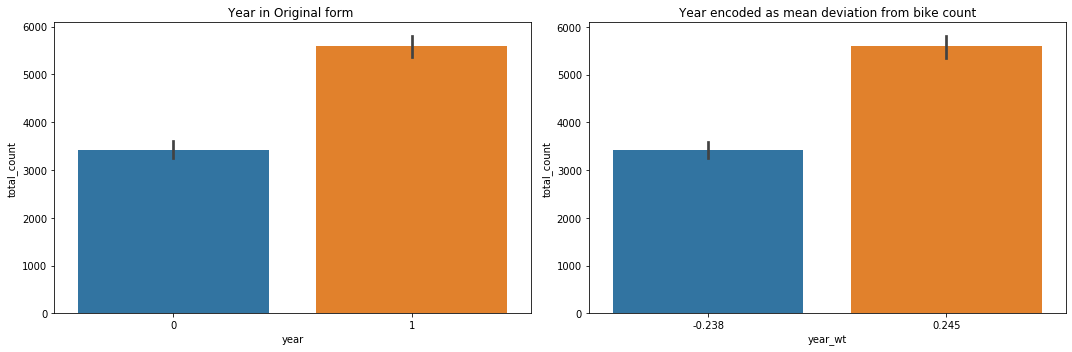

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Year in Original form ")
sns.barplot(x= X_train['year'],y=y_train)

plt.subplot(1,2,2)
plt.title("Year encoded as mean deviation from bike count")
sns.barplot(X_train['year_wt'],y_train)

plt.tight_layout()

In [41]:
#Now Drop the original feature "year"
X_train.drop(labels='year',axis=1,inplace=True)
X_test.drop(labels='year',axis=1,inplace=True)

#### Variable- "Holiday"

In [42]:
X_train['holiday'].value_counts()

0    534
1     14
Name: holiday, dtype: int64

In [43]:
holiday_grp = train_set['total_count'].groupby(train_set['holiday']).mean()
holiday_grp

holiday
0    4501.367041
1    4192.142857
Name: total_count, dtype: float64

In [44]:
#run the anova test first to see if the mean for each holiday value differes significantly

#group the samples as per holidays
holiday_1 = train_set[train_set['holiday']==0]
holiday_2 = train_set[train_set['holiday']==1]


#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(holiday_1.total_count,holiday_2.total_count)

(array([0.34849245]), array([0.555212]))

#As p-value is greater than critical value i.e. 0.05 we are failed to reject the null hypothesis and conclude that mean of bike count for holiday and non-holiday days are somewhat similar

So for now we drop the variable holiday from our dataset

In [45]:
X_train.drop(labels="holiday",axis=1,inplace=True)
X_test.drop(labels="holiday",axis=1,inplace=True)

#### Variable- "Weekday"

In [46]:
X_train.weekday.value_counts()

4    80
3    79
1    79
6    78
0    78
5    77
2    77
Name: weekday, dtype: int64

In [47]:
weekday_grp = train_set['total_count'].groupby(train_set['weekday']).mean()
weekday_grp

weekday
0    4105.141026
1    4510.949367
2    4623.168831
3    4350.215190
4    4621.475000
5    4721.246753
6    4524.987179
Name: total_count, dtype: float64

In [48]:
#run the anova test first to see if the mean for each weekday differes significantly

#group the samples as per weekdays
weekday_0 = train_set[train_set['weekday']==0]
weekday_1 = train_set[train_set['weekday']==1]
weekday_2 = train_set[train_set['weekday']==2]
weekday_3 = train_set[train_set['weekday']==3]
weekday_4 = train_set[train_set['weekday']==4]
weekday_5 = train_set[train_set['weekday']==5]
weekday_6 = train_set[train_set['weekday']==6]

#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(weekday_0.total_count,weekday_1.total_count,weekday_2.total_count,weekday_3.total_count,weekday_4.total_count,weekday_5.total_count,weekday_6.total_count)

(array([0.89437398]), array([0.49859742]))

As p-value comes out to be greater than 0.05 we are failed to reject the null hypothesis.

So we conclude that avg bike count for various week days are not significantly different

Thus we would drop the variable weekday from our dataset

In [49]:
X_train.drop(labels="weekday",axis=1,inplace=True)
X_test.drop(labels="weekday",axis=1,inplace=True)

#### Variable- "Working Day"

In [50]:
X_train.workingday.value_counts()

1    378
0    170
Name: workingday, dtype: int64

In [51]:
workingday_grp = train_set['total_count'].groupby(train_set['workingday']).mean()
workingday_grp

workingday
0    4304.941176
1    4578.253968
Name: total_count, dtype: float64

In [52]:
#run the anova test first to see if the mean for each workingday value differes significantly

#group the samples as per workingdays
workingday_1 = train_set[train_set['workingday']==0]
workingday_2 = train_set[train_set['workingday']==1]


#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(workingday_1.total_count,workingday_2.total_count)

(array([2.34868556]), array([0.12596788]))

As p-value is greater than 0.05 we are failed to reject the null hypothesis

So we conclude that for both working and non working day avg of total bike count doesn't differ much

We would drop the variable working day from our dataset

In [53]:
X_train.drop(labels="workingday",axis=1,inplace=True)
X_test.drop(labels="workingday",axis=1,inplace=True)
X_train.shape,X_test.shape

((548, 7), (183, 7))

#### Variable- "Weather Condition "

In [54]:
X_train.weather_condition.value_counts()

1    343
2    189
3     16
Name: weather_condition, dtype: int64

In [55]:
weather_grp = train_set['total_count'].groupby(train_set['weather_condition']).mean()
weather_grp

weather_condition
1    4829.577259
2    4117.486772
3    1729.375000
Name: total_count, dtype: float64

In [56]:
#run the anova test first to see if the mean for each weather_condition differes significantly

#group the samples as per weather_conditions
weather_condition_1 = train_set[train_set['weather_condition']==1]
weather_condition_2 = train_set[train_set['weather_condition']==2]
weather_condition_3 = train_set[train_set['weather_condition']==3]


#Null hypothesis H0 -> "the group mean is same as population mean"
#Alternate Hypothesis H1 -> "the group mean is different than the population mean"
f_oneway(weather_condition_1.total_count,weather_condition_2.total_count,weather_condition_3.total_count)

(array([27.53922787]), array([4.03977688e-12]))

As p-value is far less than 0.05 we reject the null hypothesis and conclude that for atleast one weather condition category the avg bike count differes significantly

In [57]:
#Encoding the variable with Rel mean deviation with target variable
weather1wt = round((weather_grp[1]-bikecount_mean)/bikecount_mean,3)
weather2wt = round((weather_grp[2]-bikecount_mean)/bikecount_mean,3)
weather3wt = round((weather_grp[3]-bikecount_mean)/bikecount_mean,3)


weatherwt_assign = {1:weather1wt,2:weather2wt,3:weather3wt}

X_train["weather_wt"] = X_train['weather_condition'].map(weatherwt_assign)
X_test["weather_wt"] = X_test['weather_condition'].map(weatherwt_assign)
X_train["weather_wt"].value_counts()

 0.075    343
-0.084    189
-0.615     16
Name: weather_wt, dtype: int64

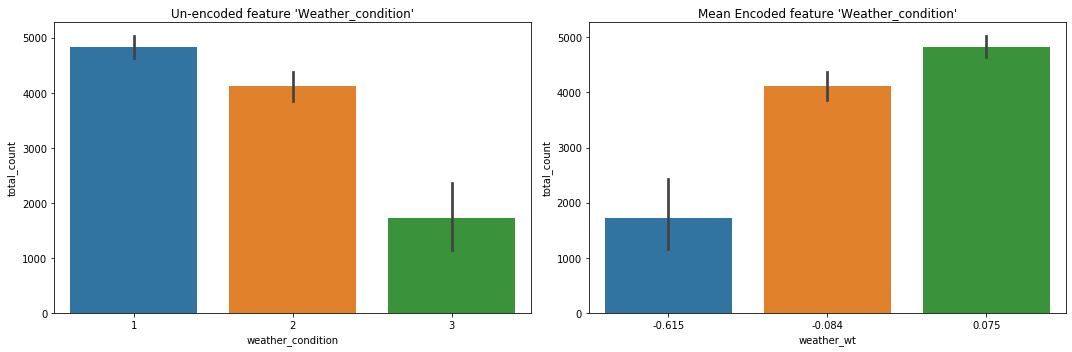

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Un-encoded feature 'Weather_condition'")
sns.barplot(x= X_train['weather_condition'],y=y_train)

plt.subplot(1,2,2)
plt.title("Mean Encoded feature 'Weather_condition'")
sns.barplot(X_train['weather_wt'],y_train)

plt.tight_layout()

In [59]:
#Now Drop the original feature "weather_condition"
X_train.drop(labels='weather_condition',axis=1,inplace=True)
X_test.drop(labels='weather_condition',axis=1,inplace=True)

#### As we can see that Among all the categorical variables Season, Month, Year & Weather Condition are filtered based on the ANOVA Test

#### Test of Independence for Categorical Variable

#### We can see that season and month are the variables representing the time of the year i.e . they are giving somewhat same info, so let's run the chi square test on these two variable and see if they really are independent

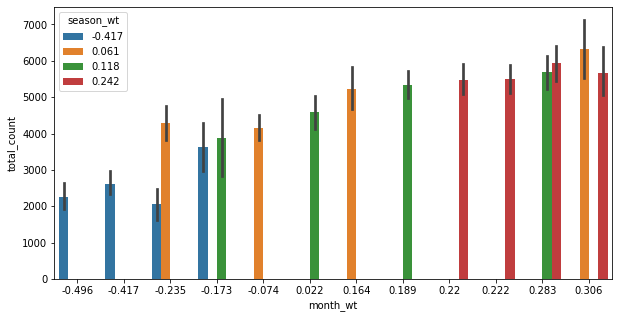

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(y = y_train,x=X_train['month_wt'], hue=X_train['season_wt'])

In [61]:
#Creating the contingency table of the observed values of season_wt & month_wt
table = pd.crosstab(X_train['season_wt'],X_train['month_wt'])
table

month_wt,-0.496,-0.417,-0.235,-0.173,-0.074,0.022,0.164,0.189,0.22,0.222,0.283,0.306
season_wt,,,,,,,,,,,,
-0.417,46,47,18,26,0,0,0,0,0,0,0,0
0.061,0,0,29,0,47,0,48,0,0,0,0,13
0.118,0,0,0,14,0,47,0,49,0,0,31,0
0.242,0,0,0,0,0,0,0,0,48,40,16,29


In [62]:
#Run the Chi square test

#Null Hypothesis H0 -> Both the categorical variables are independent of each other
#Alternate Hypothesis H1 -> Both the categorical variables are dependent on each other

stat,p,dof,_ = chi2_contingency(table)
stat,p,dof

(1325.994630500457, 1.237221520714075e-257, 33)

As the test statistics is very high and the p-value is very less than 0.05, we can confidently reject the null hypothesis and conclude that these variables are highly dependent on each other

let's drop the season variabe as it is highly correlated with the feature month_wt

In [63]:
X_train.drop(labels=["season_wt"],axis=1,inplace=True)
X_test.drop(labels=["season_wt"],axis=1,inplace=True)
X_train.shape,X_test.shape

((548, 6), (183, 6))

#Let's now compare month & weather_condition variable to see the association

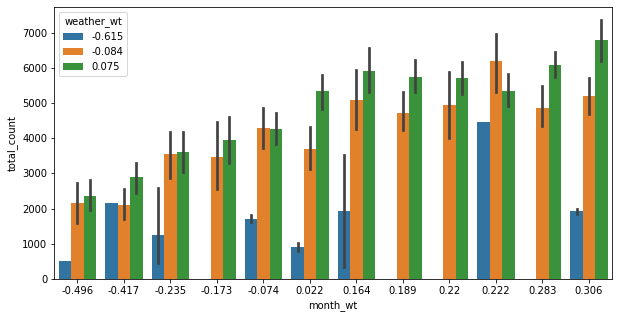

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(y = y_train,x=X_train['month_wt'], hue=X_train['weather_wt'])

In [65]:
table2 = pd.crosstab(X_train['month_wt'],X_train['weather_wt'])
table2

weather_wt,-0.615,-0.084,0.075
month_wt,,,
-0.496,1,14,31
-0.417,1,16,30
-0.235,3,19,25
-0.173,0,19,21
-0.074,2,14,31
0.022,2,16,29
0.164,4,20,24
0.189,0,19,30
0.220,0,14,34


In [66]:
stat2,p2,dof2,_ = chi2_contingency(table2)
stat2,p2,dof2

(28.63582711427644, 0.15555471124127923, 22)

#In this case we failed to reject the null hypothesis that the month_wt and weather_wt variables are independent, so we will keep both the variables in dataset

## Modeling

### Model Selection

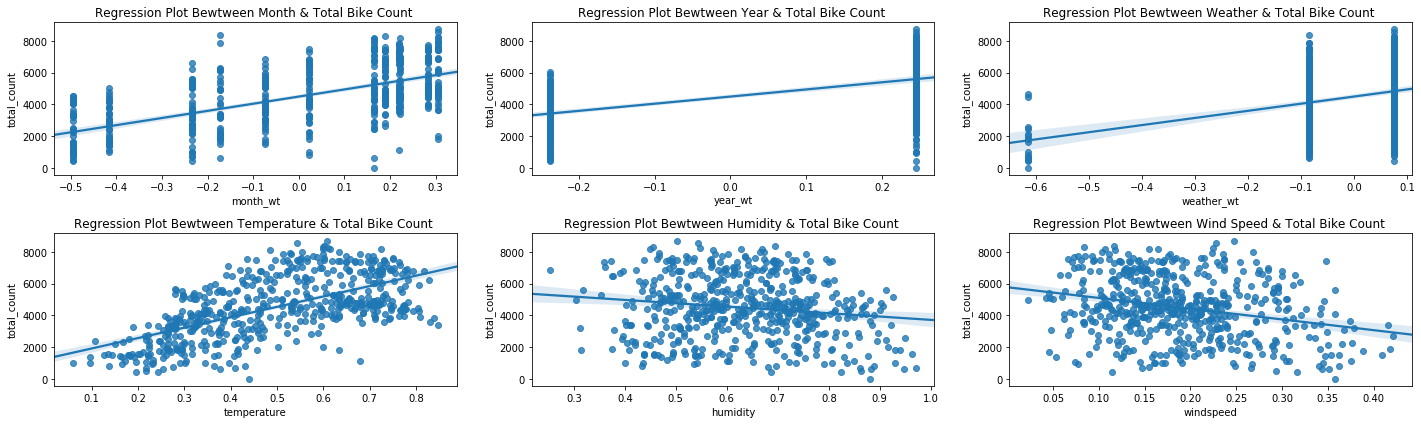

In [67]:
#see the relationship between independent and dependent variable
plt.figure(figsize=(20,6))

plt.subplot(2,3,1)
plt.title("Regression Plot Bewtween Month & Total Bike Count ")
sns.regplot(X_train['month_wt'],y_train)

plt.subplot(2,3,2)
plt.title("Regression Plot Bewtween Year & Total Bike Count ")
sns.regplot(X_train['year_wt'],y_train)

plt.subplot(2,3,3)
plt.title("Regression Plot Bewtween Weather & Total Bike Count ")
sns.regplot(X_train['weather_wt'],y_train)

plt.subplot(2,3,4)
plt.title("Regression Plot Bewtween Temperature & Total Bike Count ")
sns.regplot(X_train['temperature'],y_train)

plt.subplot(2,3,5)
plt.title("Regression Plot Bewtween Humidity & Total Bike Count ")
sns.regplot(X_train['humidity'],y_train)

plt.subplot(2,3,6)
plt.title("Regression Plot Bewtween Wind Speed & Total Bike Count ")
sns.regplot(X_train['windspeed'],y_train)

plt.tight_layout()

#### Mulitple Linear Regression Model

In [68]:
model_mlr = LinearRegression()
model_mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#See the coefficient
coeff_mlr = pd.DataFrame(model_mlr.coef_,index= X_train.columns)
coeff_mlr

,0
temperature,2255.929358
humidity,-936.532217
windspeed,-3416.897783
month_wt,3148.847449
year_wt,4378.346385
weather_wt,3019.047207


In [70]:
model_mlr.intercept_

4624.16424661131

In [71]:
#Predicting the bike count for test set
y_pred_mlr = model_mlr.predict(X_test)

#### Decision Tree 

In [72]:
model_DT = DecisionTreeRegressor(random_state=random_state)
model_DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=29, splitter='best')

In [73]:
y_pred_DT = model_DT.predict(X_test)

#### Random Forest Regressor

In [74]:
model_rf = RandomForestRegressor(random_state=random_state)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)

In [75]:
y_pred_rf = model_rf.predict(X_test)

### Model Evaluation

In [76]:
#define a function to measure performance metrics
def performance_metrics(y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_true,y_pred))
    print("R2 Score - {}, RMSE = {}, RMSLE = {}".format(round(r2,3),round(rmse,0),round(rmsle,3)))

###### For comparision purpose let's check the performance parameters for all the models created and then on the basis of that select the model that have best perfomance

In [77]:
#for Multiple Linear Regression
performance_metrics(y_test,y_pred_mlr)

R2 Score - 0.76, RMSE = 955.0, RMSLE = 0.324


In [78]:
#for Decision Tree Regressor
performance_metrics(y_test,y_pred_DT)

R2 Score - 0.733, RMSE = 1006.0, RMSLE = 0.317


In [79]:
#for Random Forest Regressor
performance_metrics(y_test,y_pred_rf)

R2 Score - 0.847, RMSE = 762.0, RMSLE = 0.249


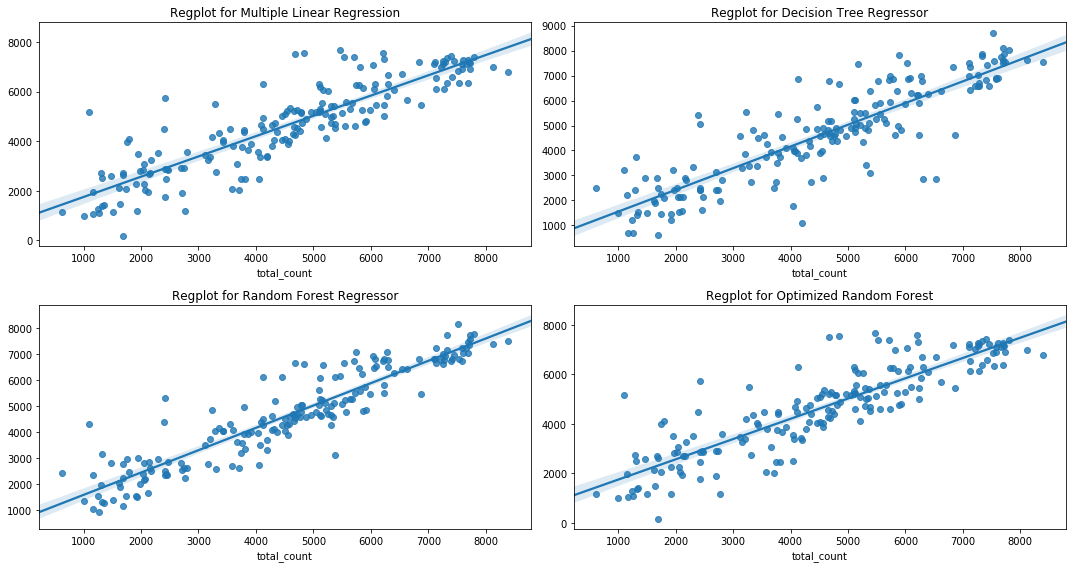

In [80]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Regplot for Multiple Linear Regression")
sns.regplot(y_test,y_pred_mlr)

plt.subplot(2,2,2)
plt.title("Regplot for Decision Tree Regressor")
sns.regplot(y_test,y_pred_DT)

plt.subplot(2,2,3)
plt.title("Regplot for Random Forest Regressor")
sns.regplot(y_test,y_pred_rf)

plt.subplot(2,2,4)
plt.title("Regplot for Optimized Random Forest")
sns.regplot(y_test,y_pred_mlr)

plt.tight_layout()

### Model Selection

On the basis of the specified performance metrics the Random Forest Regressor performed better than all the other models, so we will proceed with the random forest regressor model

However we can further optimize our performance by tuning of hyper parameters of random forest regressor algorithm

#### Hyper-Parameter Tuning of Random Forest Regressor with the help of Randomized Search CV

#To initiate the hyper parameter tuning we first need to categorize which parameter is to be used for the optimization and then accordingly provide suitable values for the respective parameters in a form of key value pairs i.e. in dictionaty form

#### To run the optimization code convert the cells below to code from markdown

param_rf = {"max_features" : ["sqrt","log2","auto"],
            "n_estimators": [200,300,400,500],
           }
           
RS_CV_rf = RandomizedSearchCV(estimator=model_rf,param_distributions=param_rf,n_iter=10,cv=5,scoring=make_scorer(r2_score),random_state=random_state)

RS_CV_rf.fit(X_train,y_train)
RS_CV_rf.best_params_

RS_CV_rf.best_estimator_

In [81]:
#Re-create the random forest model with tuned hyperparameters and then see the improvement through performance metrics
model_rf_tuned = RandomForestRegressor(n_estimators=400,max_features="log2",random_state=random_state)
model_rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = model_rf_tuned.predict(X_test)

In [82]:
performance_metrics(y_test,y_pred_rf_tuned)

R2 Score - 0.861, RMSE = 726.0, RMSLE = 0.24


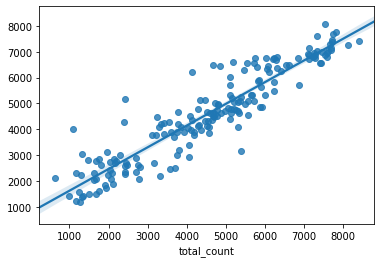

In [83]:
sns.regplot(y_test,y_pred_rf_tuned)

As we can see that i have increased the R2 score from 84.7% to 86.1%, the RMSE error reduced from 762 to 726 & RMSLE decreases from 0.249 to 0.240

Thus we have optimized our model by tuning the hyperparameter

Now let's store the actual count and predicted bike count in a submission file as a result of our ML Model

In [84]:
true_bike=pd.DataFrame(data= np.array(y_test),columns=['Actual Count'])
pred_bike=pd.DataFrame(data= y_pred_rf_tuned,columns=['Predicted Count'])
Bike_predictions=pd.concat(objs=(true_bike,pred_bike),axis=1)
Bike_predictions.head()

,Actual Count,Predicted Count
0,7261,6960.4425
1,1510,1496.8025
2,7446,7007.4025
3,6093,6203.8025
4,5495,4980.4175


In [85]:
#storing the file in working directory
Bike_predictions.to_csv('Submission_bike_Python.csv')